## Fashion MNIST

To learn more about Fashion MNIST read [this](https://github.com/zalandoresearch/fashion-mnist)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from random import randint

## Load the fashion MNIST dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Visualize the training data

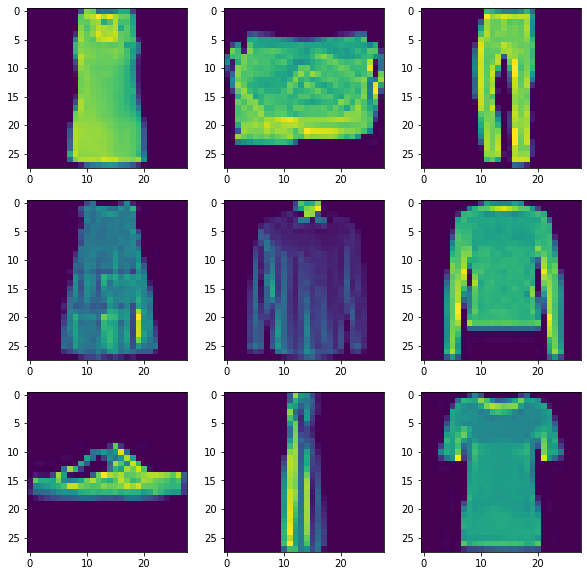

In [3]:
# Use this to generate random integers between [0, training_images.shape[0]]
figure, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))

for row in axes:
    for column in row:
        column.imshow(training_images[randint(0, training_images.shape[0])])

plt.show()

## Exploratory Analysis

Training Labels with their English Description

0: T-shirt/top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle boot

In [4]:
uniques, counts = np.unique(training_labels, return_counts=True)

for unique, count in zip(uniques, counts): 
    print ("Label {} and Count {}".format(unique, count))

Label 0 and Count 6000
Label 1 and Count 6000
Label 2 and Count 6000
Label 3 and Count 6000
Label 4 and Count 6000
Label 5 and Count 6000
Label 6 and Count 6000
Label 7 and Count 6000
Label 8 and Count 6000
Label 9 and Count 6000


## Normalize the dataset

Normalizing the dataset means we have 0 mean and unit variance. This is very important in "preparing" the dataset before feeding it to the ML Algorithm

In [5]:
training_images = training_images / 255.0
test_images = test_images / 255.0

## Build a Simple Feed Forward NN

In [6]:
model = tf.keras.models.Sequential()
# Flatten each 28 x 28 square image into a 784 dimensional vector
model.add(tf.keras.layers.Flatten())
# Accepts input of form (784, *) and outputs a matrix with dimension (128, *)
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Accepts input of form (128, *) and outputs a matrix with dimension (10, *)
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

### Provide the optimizer and the loss function

In [7]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Experiment with callbacks

We can use callback to stop training when certain conditions are met. For more details read [this](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback)

In [8]:
class ExperimentalCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        # Want my model to be 94% accurate
        if (logs["accuracy"] >= 0.94):
            self.model.stop_training = True

### Train the Neural Network

In [9]:
callbacks = ExperimentalCallback()
model.fit(training_images, training_labels, epochs=30, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 43us/sample - loss: 0.4972 - accuracy: 0.8246
Epoch 2/30
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3754 - accuracy: 0.8651
Epoch 3/30
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3351 - accuracy: 0.8766
Epoch 4/30
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3114 - accuracy: 0.8849
Epoch 5/30
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2950 - accuracy: 0.8914
Epoch 6/30
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2809 - accuracy: 0.8956s - l
Epoch 7/30
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2660 - accuracy: 0.9014
Epoch 8/30
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2579 - accuracy: 0.9045
Epoch 9/30
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2474 - accuracy: 0.9080
Epoch 10/

### Evaluate the model

In [10]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 25us/sample - loss: 0.3971 - accuracy: 0.8842


[0.397133726978302, 0.8842]

## Model prediction

A prediction is an array of numbers. In this case they represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing.

[[3.6969982e-19 3.5347750e-25 1.0782144e-17 3.1295551e-20 8.4004941e-21
  8.8554769e-10 1.3423855e-19 6.2407939e-06 8.5890390e-16 9.9999380e-01]]

Image most resembles label = 9

Real world label = 9

Actual Image



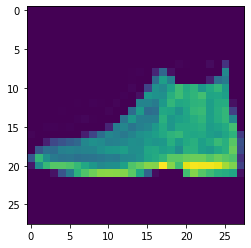

In [11]:
# We need to do this because the NN expects inputs of form (*, (28, 28))
single_test_example = test_images[0].reshape(1, test_images[0].shape[0], test_images[0].shape[1])

# Compute the model's prediction
prediction = model.predict(single_test_example)
print (prediction)

# Which label has the highest confidence value
print ()
print ("Image most resembles label = {}".format(np.argmax(prediction[0])))

# Test this prediction in the real world
print ()
print ("Real world label = {}".format(test_labels[0]))

# Plot the image
print ()
print ("Actual Image")
print ()
plt.imshow(test_images[0])
plt.show()